# Mutlislice features and parameters
In these examples will be using the same structure and play around with some parameters and features of the **autoslic** program. 
Most of the arguments and parameters have been presented in [example_0](http://badb.rc-harwell.ac.uk:8888/notebooks/multislice/example_0.ipynb). 
- [Base simulation](#Base-simulation)
- [Reducing the slice thickness](#Reducing-the-slice-thickness)
- [Sampling](#Sampling)
- [Rocking curve](#Rocking-curve)
- [Padding](#Padding)
- [Orienting the structure](#Orienting-the-structure)
    - [45degree rotation around the 001 axis](#[001]-orientation-with-45-degree-angle)
    - [111 with large padding](#[111]-orientation-with-large-padding)
    - [Orienting without padding](#Orienting-without-padding)

In [1]:
import importlib as imp
import multislice.multislice as mupy;imp.reload(mupy)       # the temsim wrapper module
import multislice.postprocess as pp ;imp.reload(pp)         # postprocess module
import multislice.mupy_utils as mut ;imp.reload(mut)        # multislice utilities
from ipywidgets import interact, interactive, fixed, interact_manual
from utils import*                         # utilities
%matplotlib notebook
path = 'data/test/'

using dpi=96
using screenszie=[20.0,11.25] inches
using dpi=96
using screenszie=[20.0,11.25] inches
using dpi=96
using screenszie=[20.0,11.25] inches
using dpi=96
using screenszie=[20.0,11.25] inches
using dpi=96
using screenszie=[20.0,11.25] inches
using dpi=96
using screenszie=[20.0,11.25] inches
using dpi=96
using screenszie=[20.0,11.25] inches


## Base simulation 


Since we will be simulating the same crystal orientation using different parameters, the `tag` parameter can be used to distinguish the simulations from one another by adding it to the naming convention. 

In [11]:
args = {'name':path,'mulslice':False,'data':'Si110.xyz','keV':200,
             'repeat':[3,2,200],'NxNy':512,'slice_thick':1.91,'Nhk':3}

In [12]:
multi0 = mupy.Multislice(tag='base', opt='srf',ppopt='w',ssh='badb',**args)

Simu name pattern = test_base_autoslic
ax=3.840A, by=5.430, cz= 3.83959
thickness = 767.918 A
Decks saved :
/data3/lii26466/multislice/test/test_base_autoslic.in
object saved
/data3/lii26466/multislice/test/test_base_autoslic.pkl
Simulation already performed in the past.
Force re-running. Deleting logfile
/data3/lii26466/multislice/test/test_base_autoslic.sh

test_base_autoslic job submitted at Wed Apr 21 12:24:19 2021


loading data/test/test_base_autoslic.pkl
displaying pattern: (330, 330)


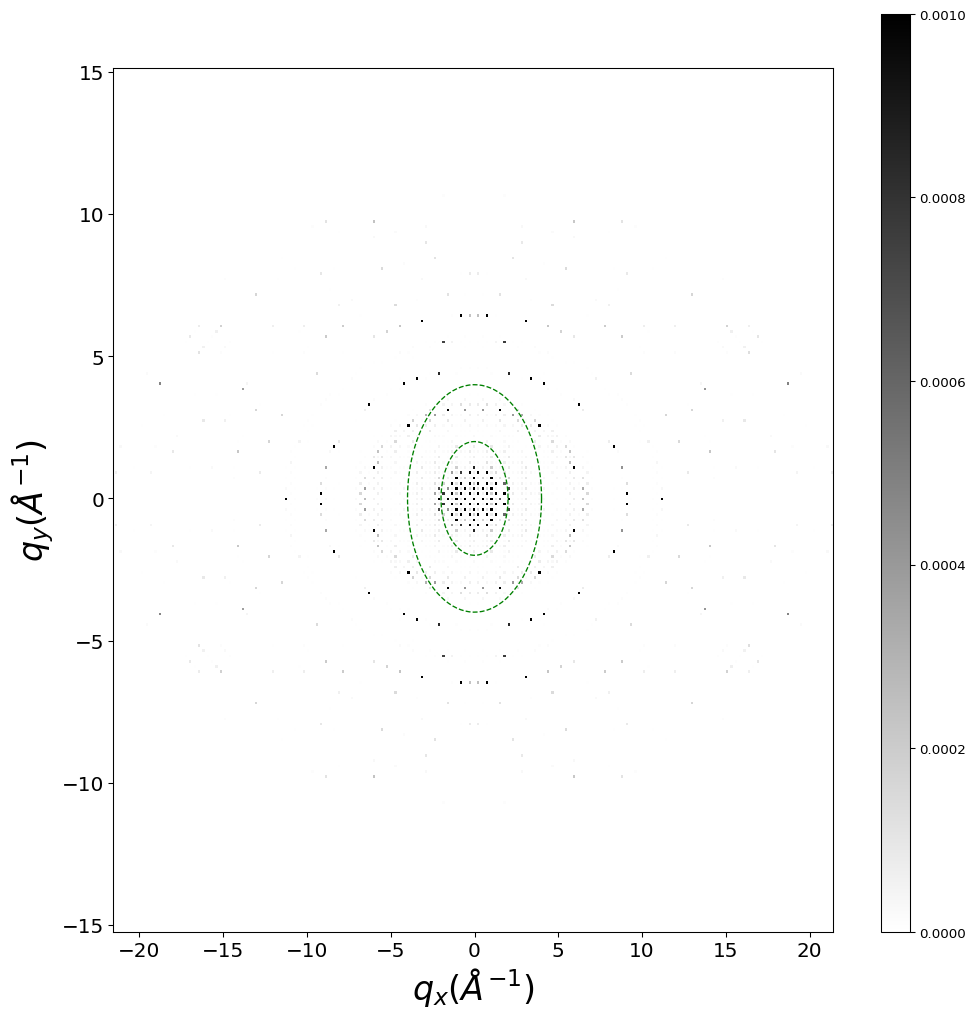

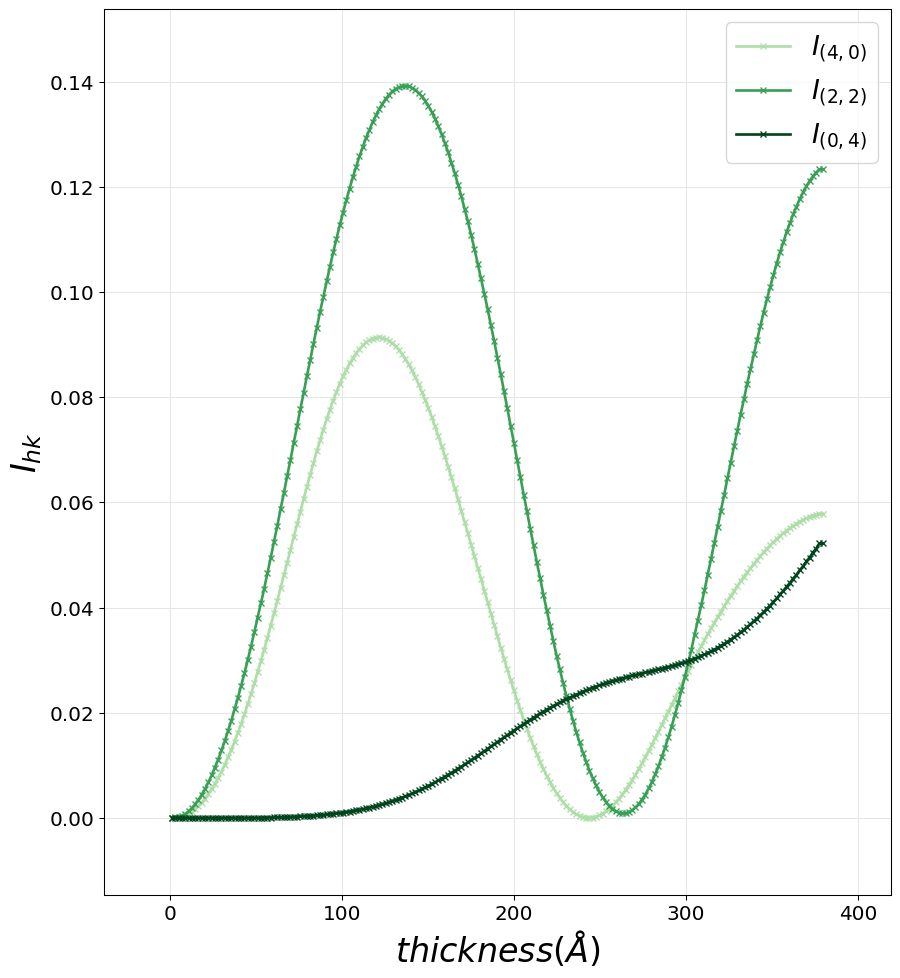

In [34]:
multi0 = pp.load(path,tag='base')
multi0.pattern(Iopt='cns',tol=1e-5,rings=[2,4],caxis=[0,0.001],xylims=5)
multi0.beam_vs_thickness()

## Reducing the slice thickness

Reducing the slice thickness in the current implementation of TEMSIM does not provide a more accurate simulaton. 
Indeed, if a slice does not contain the center of an atom, its transmission function will be  unity even though there is some electrostatic potential in this slice.  

Here we divide the slice thickness by 4 keeping all other things constants. 

In [18]:
args1=args.copy()
args1['slice_thick'] /= 4
multi1 = mupy.Multislice(tag='slice', opt='srfp',ppopt='w',ssh='badb',**args1)

Simu name pattern = test_slice_autoslic
ax=3.840A, by=5.430, cz= 3.83959
thickness = 383.959 A
Decks saved :
/data3/lii26466/multislice/test/test_slice_autoslic.in
object saved
/data3/lii26466/multislice/test/test_slice_autoslic.pkl
Simulation already performed in the past.
/data3/lii26466/multislice/test/test_slice_autoslic.sh

test_slice_autoslic job submitted at Fri Apr 16 10:13:49 2021


By comparing the beam evolution with thickness for the **base** and the reduced **slice** thickness simulation, it is clear that the addition of the intermediate slices do not have any effect on the propagation of the beam. 
This is obvious from the constant lines appearing in the thickness dependant evolution of the beam.

In [5]:
multi0 = pp.load(path,'base')
multi0.print_log()

loading data/test/test_base_autoslic.pkl
Imax=0.9971,zmax=385.8,cpuT=140.3,wallT=10.6
######################################################################
			.log FILE :
######################################################################

------------------------------------------------------------------------------
------------------------------------------------------------------------------
This header has been produced by multislice library
version : 1.4.2
date : Fri Apr 16 12:36:12 2021
author : Tarik Ronan Drevon
e-mail : tarik.drevon@stfc.ac.uk
------------------------------------------------------------------------------
------------------------------------------------------------------------------
autoslic(e) version dated 2-jun-2014 (ejk)
Copyright (C) 1998-2013 Earl J. Kirkland
This program is provided AS-IS with ABSOLUTELY NO WARRANTY
 under the GNU general public license

perform CTEM multislice with automatic slicing and FFTW
and multithreaded using openMP
 
Name of 

loading data/test/test_base_autoslic.pkl
loading data/test/test_slice_autoslic.pkl


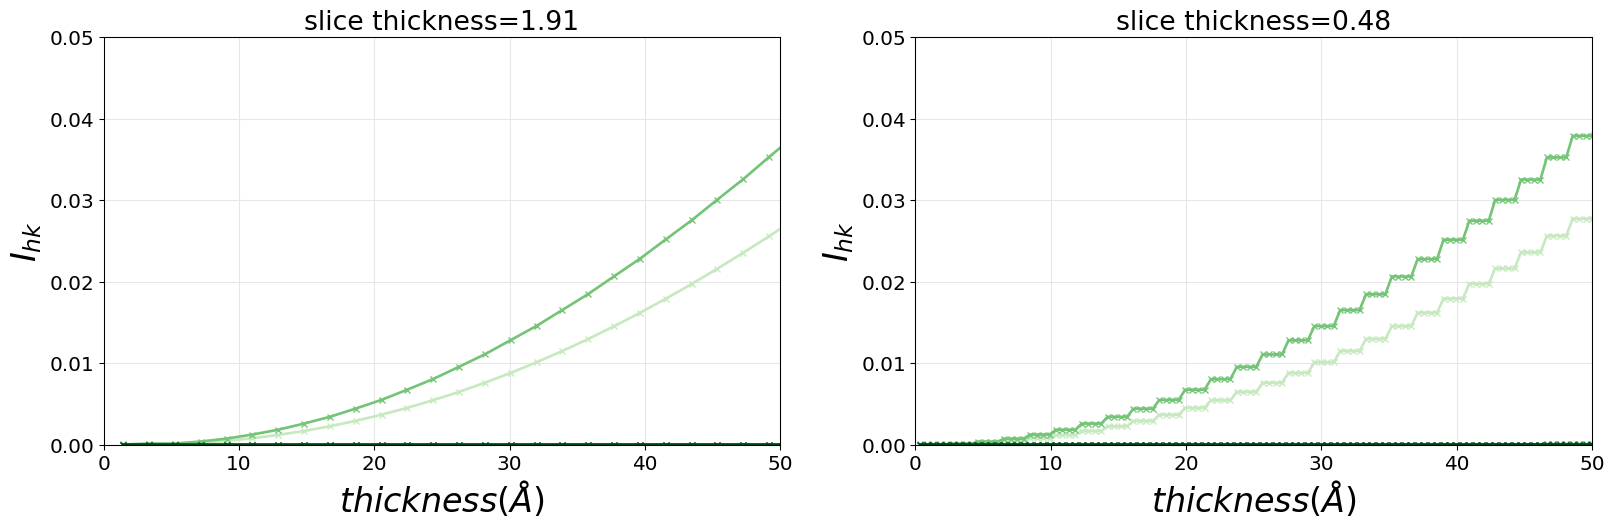

In [32]:
multi0 = pp.load(path,'base')
multi1 = pp.load(path,'slice')
fig,(ax0,ax1) = dsp.create_fig(figsize='21',rc='12')
multi0.beam_vs_thickness(tol=1e-3,xylims=[0,50,0,0.05],title='slice thickness=%.2f' %args['slice_thick'] ,ax=ax0,pOpt='tXG')
multi1.beam_vs_thickness(tol=1e-3,xylims=[0,50,0,0.05],title='slice thickness=%.2f' %args1['slice_thick'],ax=ax1,pOpt='tXG')

## Sampling
In this example we increase the sampling and the size of the super cell.

In [10]:
args_rep = args.copy();args_rep['repeat']=[9,6,20]
multi_rep = mupy.Multislice(tag='rep', opt='srp',ppopt='w',ssh='badb',**args_rep)

Simu name pattern = test_rep_autoslic
ax=3.840A, by=5.430, cz= 3.83959
thickness = 76.792 A
Decks saved :
/data3/lii26466/multislice/test/test_rep_autoslic.in
object saved
/data3/lii26466/multislice/test/test_rep_autoslic.pkl
Simulation already performed in the past.
...postprocessing...
done


In [11]:
args_Nxy = args_rep.copy();args_Nxy['NxNy']=2**11
multi_Nxy = mupy.Multislice(tag='Nxy', opt='srfp',ppopt='w',ssh='badb',**args_Nxy)

Simu name pattern = test_Nxy_autoslic
ax=3.840A, by=5.430, cz= 3.83959
thickness = 76.792 A
Decks saved :
/data3/lii26466/multislice/test/test_Nxy_autoslic.in
object saved
/data3/lii26466/multislice/test/test_Nxy_autoslic.pkl
Simulation already performed in the past.
/data3/lii26466/multislice/test/test_Nxy_autoslic.sh

test_Nxy_autoslic job submitted at Mon Apr 19 13:01:38 2021
...postprocessing...
done


loading data/test/test_base_autoslic.pkl
Imax=0.9995,zmax=78.3,cpuT=30.4,wallT=2.8
loading data/test/test_rep_autoslic.pkl
Imax=0.9960,zmax=78.3,cpuT=28.9,wallT=2.7
loading data/test/test_Nxy_autoslic.pkl
Imax=0.9998,zmax=78.3,cpuT=133.0,wallT=46.9
displaying pattern: (512, 512)
displaying pattern: (512, 512)
displaying pattern: (512, 512)


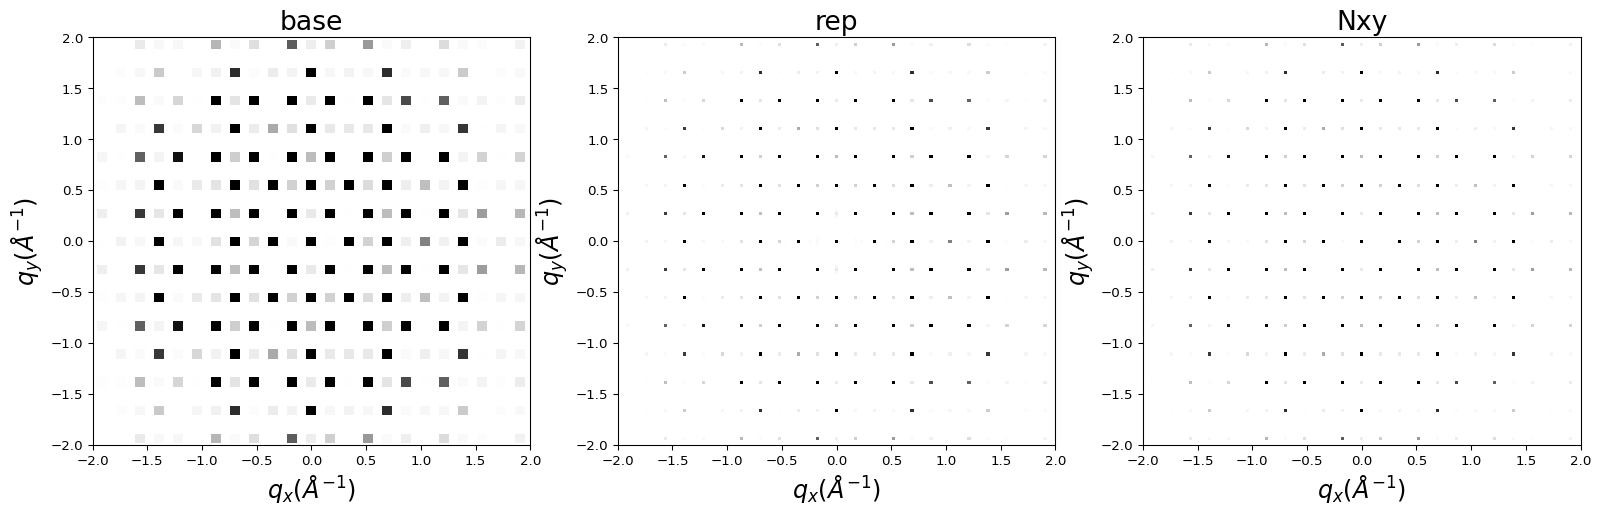

In [34]:
multi_base = pp.load(path,tag='base');multi_base.log_info()
multi_rep = pp.load(path,tag='rep');multi_rep.log_info()
multi_Nxy = pp.load(path,tag='Nxy');multi_Nxy.log_info()

fig,(ax0,ax1,ax2) = dsp.create_fig(figsize='21',rc=[1,3])
p_args={'xylims':2,'pOpt':'tX','fonts':{'lab':18,'tick':10},'caxis':[0,0.001]}
multi_base.pattern(Iopt='ns',tol=1e-5,ax=ax0,title='base',**p_args);
multi_rep.pattern( Iopt='ns',tol=1e-5,ax=ax1,title='rep' ,**p_args);
multi_Nxy.pattern( Iopt='ns',tol=1e-5,ax=ax2,title='Nxy' ,**p_args);

Due to the properties of the Discrete Fourier Transform, increasing the super cell size increases the reciprocal space resolution. 

Increasing the sampling keeping the super cell size constant increases the resolution in real space which is usually far greater than the experimental one. Besides, increasing the sampling provides a better conservation of the total intensity which comes at a greater computational cost. 

## Rocking curve
In this subsection we are showing how to simulate a rocking curve with temsim. This can be achieved by runing the same simulation with a slightly different tilt angle. 

To this end, we can use the class `Rocking` which will generate a series of tilted simulations from the `tilt` parameter. The constructor of this class is similar to `Multislice` but contains parameters`tx` and `ty` which are used to specify the range of tilt angles simulated. The tag for the simulations will automatically be of the form `<tag>_tilt<id>`. 

The simulation objects are stored in a dataframe which displays useful information. Since we are using the `badb` cluster, all those simulations should run simultaneously.

In [5]:
args_rock={'name':path,'mulslice':False,'data':'Si110.xyz','keV':200,
             'repeat':[3,2,200],'NxNy':512,'slice_thick':1.91,'Nhk':3}
rock = mupy.Rocking(tx=np.arange(-10,11)*0.01,ty=0, tag='tx',ssh='badb', opt='sr',v=0,**args_rock)

tilt: [-1.7453292519943295, 0.0] 
/data3/lii26466/multislice/test/test_tx_tilt000_autoslic.sh



/home/lii26466/.local/lib/python3.7/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.array(value)


tilt: [-1.5707963267948963, 0.0] 
/data3/lii26466/multislice/test/test_tx_tilt001_autoslic.sh

tilt: [-1.3962634015954638, 0.0] 
/data3/lii26466/multislice/test/test_tx_tilt002_autoslic.sh

tilt: [-1.2217304763960308, 0.0] 
/data3/lii26466/multislice/test/test_tx_tilt003_autoslic.sh

tilt: [-1.0471975511965976, 0.0] 
/data3/lii26466/multislice/test/test_tx_tilt004_autoslic.sh

tilt: [-0.8726646259971648, 0.0] 
/data3/lii26466/multislice/test/test_tx_tilt005_autoslic.sh

tilt: [-0.6981317007977319, 0.0] 
/data3/lii26466/multislice/test/test_tx_tilt006_autoslic.sh

tilt: [-0.5235987755982988, 0.0] 
/data3/lii26466/multislice/test/test_tx_tilt007_autoslic.sh

tilt: [-0.34906585039886595, 0.0] 
/data3/lii26466/multislice/test/test_tx_tilt008_autoslic.sh

tilt: [-0.17453292519943298, 0.0] 
/data3/lii26466/multislice/test/test_tx_tilt009_autoslic.sh

tilt: [0.0, 0.0] 
/data3/lii26466/multislice/test/test_tx_tilt010_autoslic.sh

tilt: [0.17453292519943298, 0.0] 
/data3/lii26466/multislice/tes

It is possible to display information about the full set of simulations by using the `update` method of the `Rocking` class. Those information are stored in a DataFrame `Rocking.df`.
Besides, individual simulations can be accessed directly with `Rocking.load(id)`

DataFrame updated and saved : 
data/test/tx_tilts.pkl
                                                     tilt state zmax(A) Inorm
test_tx_tilt000_autoslic.pkl   [-1.7453292519943295, 0.0]  done  769.75  0.99
test_tx_tilt001_autoslic.pkl   [-1.5707963267948963, 0.0]  done  769.75  0.99
test_tx_tilt002_autoslic.pkl   [-1.3962634015954638, 0.0]  done  769.75  0.99
test_tx_tilt003_autoslic.pkl   [-1.2217304763960308, 0.0]  done  769.75  0.99
test_tx_tilt004_autoslic.pkl   [-1.0471975511965976, 0.0]  done  769.75  0.99
test_tx_tilt005_autoslic.pkl   [-0.8726646259971648, 0.0]  done  769.75  0.99
test_tx_tilt006_autoslic.pkl   [-0.6981317007977319, 0.0]  done  769.75  0.99
test_tx_tilt007_autoslic.pkl   [-0.5235987755982988, 0.0]  done  769.75  0.99
test_tx_tilt008_autoslic.pkl  [-0.34906585039886595, 0.0]  done  769.75  0.99
test_tx_tilt009_autoslic.pkl  [-0.17453292519943298, 0.0]  done  769.75  0.99
test_tx_tilt010_autoslic.pkl                   [0.0, 0.0]  done  769.75  1.00
test_tx_ti

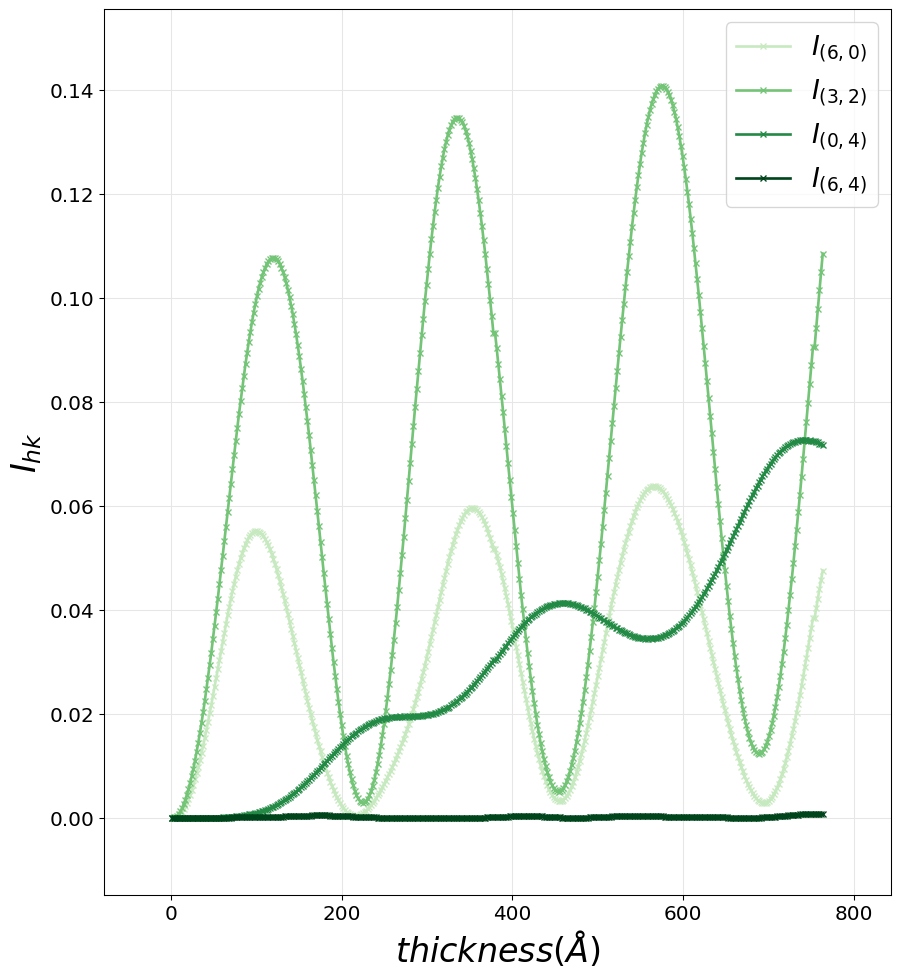

In [8]:
rock = pp.rock_load(path,'tx')
rock.update()
ms0 = rock.load(0)
ms0.beam_vs_thickness(tol=1e-4)

The rocking curve for the beams `iBs`,  can be obtained at the different thicknesses `zs`  with the `plot_rocking` method.

Here we display it for beam $qx,qy=(3,2)$ ie $h,k=(1,1)$ at peak thicknesses $100A, 350A, 580A$ and valleys  $220A, 450A, 700A$.

DataFrame updated and saved : 
data/test/tilts.pkl
DataFrame updated and saved : 
data/test/tilts.pkl


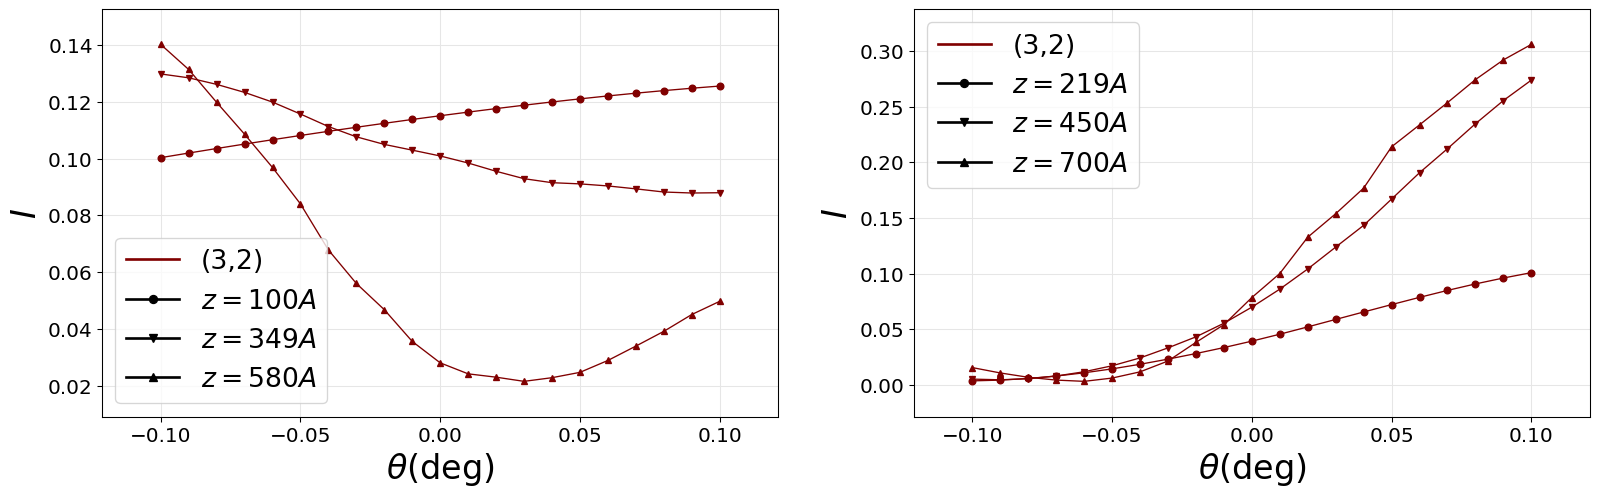

In [4]:
fig,(ax0,ax1) = dsp.create_fig(figsize='21',rc=[1,2])
rock.plot_rocking(iBs=[(3,2)],zs=[100,350,580],ax=ax0,setPos=0)
rock.plot_rocking(iBs=[(3,2)],zs=[220,450,700],ax=ax1,setPos=0)

## Padding

In order to simulate finite size effect and crystal in arbtrary orientations, it is necessary to simulate multiple unit cells with additional padding on each side. To this end, the coordinate file fed to `autoslic` must be changed accordingly. 

We use the `gen_xyz` method from the `mupy_utils` module to generate an **.xyz** file from a structure with the following parameters : 
- file : str - cif_file or name of structure or pattern
- rep  : list - [Nx,Ny,Nz] super cell
- n    : list - the vector along which the beam is oriented in the crystal frame (the coordinates of the crystal will be rearranged such that the beam reamins along the z axis )
- theta : The angle to rotate the structure around the beam.
- pad   : The amount of padding on each side (in unit of the super cell).

### base simulation
For these simulations, we use the following parameters.
In order to do a proper comparison, we first need to simulate the same orientation without padding.

The coordinates file can be visualized with  `show_grid` method where `opts` indicate the plane in which the view is projected.

In [137]:
args_pad={'name':path,'mulslice':False,'keV':200,'i_slice':10,
             'repeat':[1,1,200],'slice_thick':1.91,'Nhk':10}

coords file saved : 
data/test/Si001.xyz


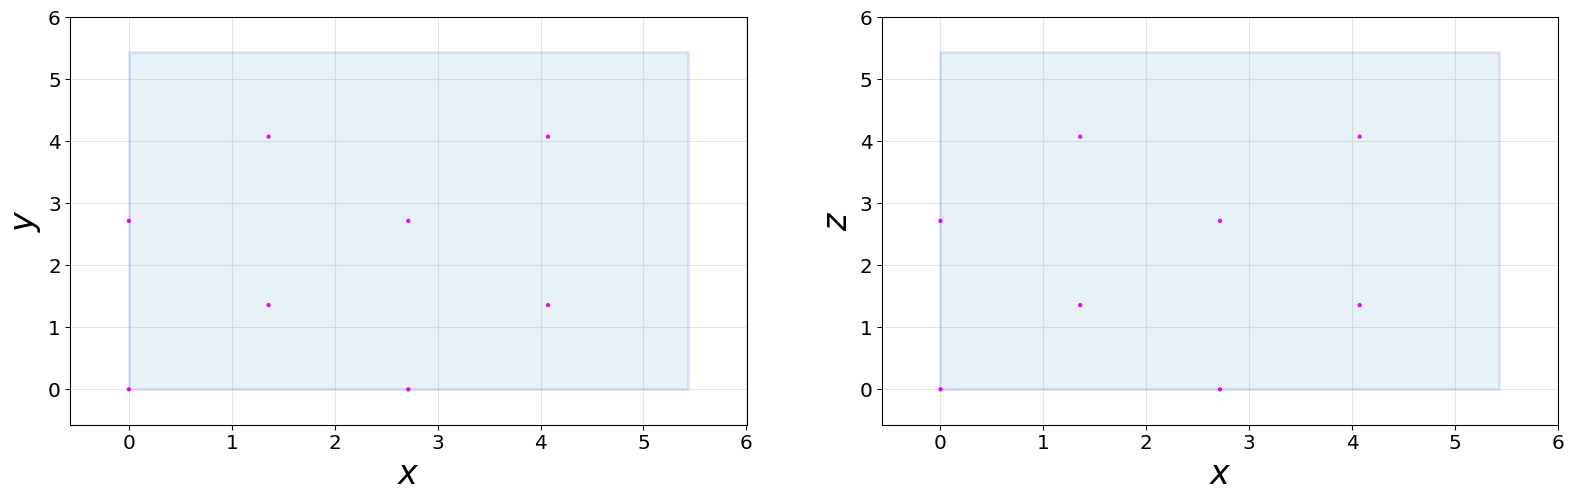

In [5]:
xyz = path+'Si001.xyz'
mut.gen_xyz('Si',n=[0,0,1],theta=0,rep=[1,1,1],pad=0,xyz=xyz)
mut.show_grid(xyz,opts=['xy','xz'])

In [138]:
mupy.Multislice(data='Si001.xyz',NxNy=2**10, opt='sr',ppopt='s',ssh='badb',tag='pad0', **args_pad);

Simu name pattern = test_pad0_autoslic
ax=5.431A, by=5.431, cz= 5.4307
simulated thickness = 1086.140 A, nslices=568
Decks saved :
/data3/lii26466/multislice/test/test_pad0_autoslic.in
object saved
/data3/lii26466/multislice/test/test_pad0_autoslic.pkl
Simulation already performed in the past.
Force re-running
/data3/lii26466/multislice/test/test_pad0_autoslic.sh

test_pad0_autoslic job submitted at Thu Apr 29 17:20:40 2021
...postprocessing...
scp: /data3/lii26466/multislice/test/test_pad0_autoslic.log: No such file or directory

not started


### Padded simulations
As a simple example the beam is oriented in the [001] direction. The crystal is $20\times 20\times 200$ and a padding of 0,1,2 and 4 units of super cell around the crystal is used. 

We also use a crystal $40\times 40\times 200$. 

In [6]:
pad=4
xyz = path+'Si001_n20_pad%d.xyz' %pad
# mut.gen_xyz('Si',n=[0,0,1],theta=0,rep=[20,20,1],pad=[pad,pad,0],xyz=xyz)

<IPython.core.display.Javascript object>


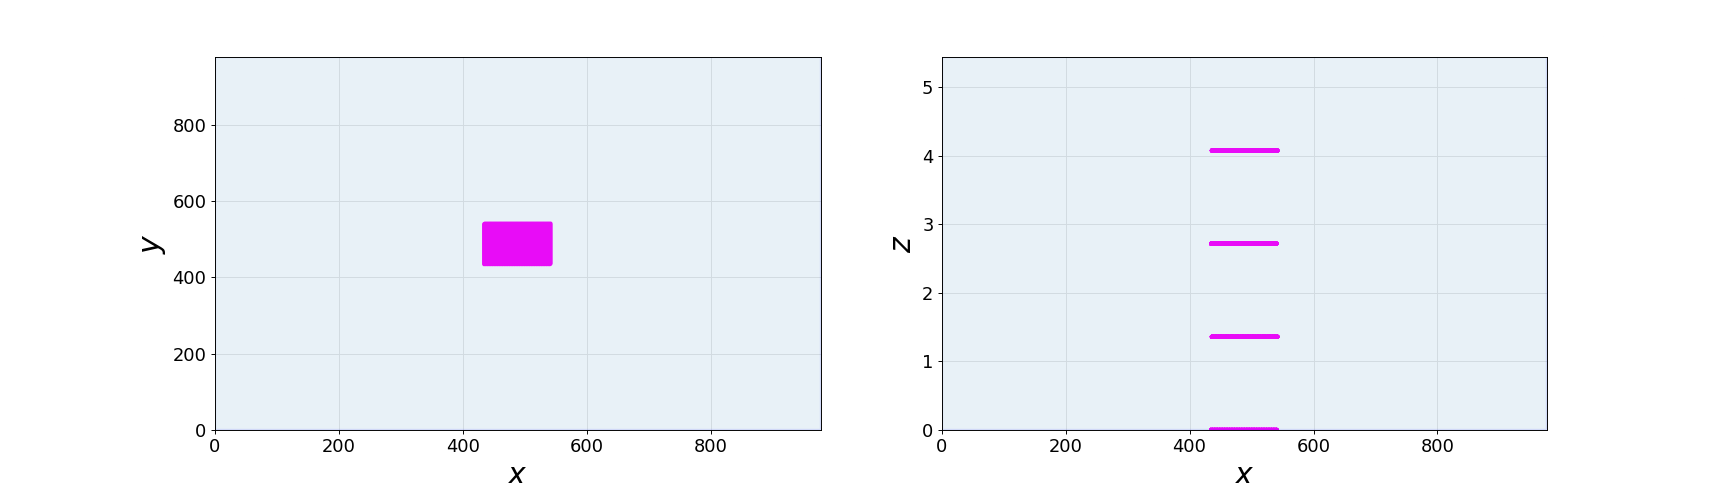

...loading file...
...plotting...
...loading file...
...plotting...


In [7]:
fig,(ax1,ax2) = dsp.create_fig(figsize='21',rc=[1,2])
mut.show_grid(xyz,opts='xy',ax=ax1,setPos=0);#,xylims=[0,550,0,550],xyTicks=50)
mut.show_grid(xyz,opts='xz',ax=ax2,setPos=0);#,xylims=[0,500,0,10])

In [51]:
args_pad['NxNy']=2**13
mupy.Multislice(data='Si001_n20_pad4.xyz',opt='sr',ppopt='ws',ssh='badb',tag='n20_pad%d' %pad, **args_pad);

Simu name pattern = test_n20_pad4_autoslic
ax=977.526A, by=977.526, cz= 5.4307
simulated thickness = 1086.140 A, nslices=568
Decks saved :
/data3/lii26466/multislice/test/test_n20_pad4_autoslic.in
object saved
/data3/lii26466/multislice/test/test_n20_pad4_autoslic.pkl
/data3/lii26466/multislice/test/test_n20_pad4_autoslic.sh

test_n20_pad4_autoslic job submitted at Wed Apr 28 11:02:43 2021


...loading file...
...plotting...
...plotting...


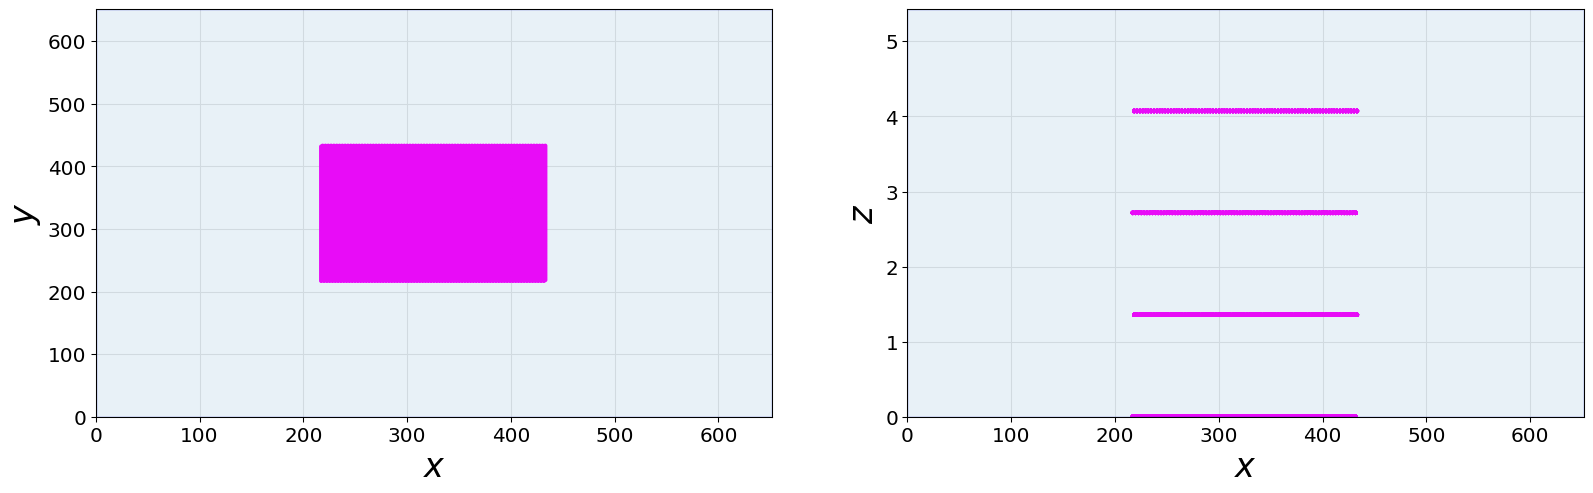

In [54]:
rep,pad=40,1
tag = 'n%d_pad%d' %(rep,pad)
xyz = 'Si001_%s.xyz' %tag
# mut.gen_xyz('Si',n=[0,0,1],theta=0,rep=[rep,rep,1],pad=[pad,pad,0],xyz=xyz)
mut.show_grid(path+xyz,opts=['xy','xz'])

In [55]:
mupy.Multislice(data=xyz,opt='sr',ppopt='ws',ssh='badb',tag=tag, **args_pad);

Simu name pattern = test_n40_pad1_autoslic
ax=651.684A, by=651.684, cz= 5.4307
simulated thickness = 1086.140 A, nslices=568
Decks saved :
/data3/lii26466/multislice/test/test_n40_pad1_autoslic.in
object saved
/data3/lii26466/multislice/test/test_n40_pad1_autoslic.pkl
/data3/lii26466/multislice/test/test_n40_pad1_autoslic.sh

test_n40_pad1_autoslic job submitted at Wed Apr 28 11:07:42 2021


### Comparison with/without padding 
Now we can see the effect of padding by comparing the simulations using **Si001.xyz** and the padded simulations **Si001_np.xyz**. 

In [3]:
imp.reload(mupy);imp.reload(pp)
multi_nopad = pp.load(path,tag='pad0')#;print(multi_pad0.check_simu_state())
multi_pad0 = pp.load(path,tag='n20_pad0',v=2);
multi_pad1 = pp.load(path,tag='n20_pad1',v=2)#;multi_pad1.print_log()
multi_pad2 = pp.load(path,tag='n20_pad2',v=2)#;multi_pad2.print_log()
multi_pad4 = pp.load(path,tag='n20_pad4',v=2)#;multi_pad4.print_log()
multi_rep4 = pp.load(path,tag='n40_pad1',v=2)#;multi_pad4.print_log()

using dpi=96
using screenszie=[20.0,11.25] inches
loading data/test/test_pad0_autoslic.pkl
loading data/test/test_n20_pad0_autoslic.pkl
simu status :  done
zmax=1084.9,Imax=0.9911,cpuT=4160.5,wallT=2014.9
loading data/test/test_n20_pad1_autoslic.pkl
simu status :  done
zmax=1084.9,Imax=0.9901,cpuT=2877.5,wallT=1757.7
loading data/test/test_n20_pad2_autoslic.pkl
simu status :  done
zmax=1084.9,Imax=0.9898,cpuT=2747.7,wallT=1736.0
loading data/test/test_n20_pad4_autoslic.pkl
simu status :  done
zmax=1084.9,Imax=0.9971,cpuT=10185.6,wallT=9727.5
loading data/test/test_n40_pad1_autoslic.pkl
simu status :  done
zmax=1084.9,Imax=0.9892,cpuT=10887.0,wallT=9747.5


displaying pattern: (434, 434)


<IPython.core.display.Javascript object>


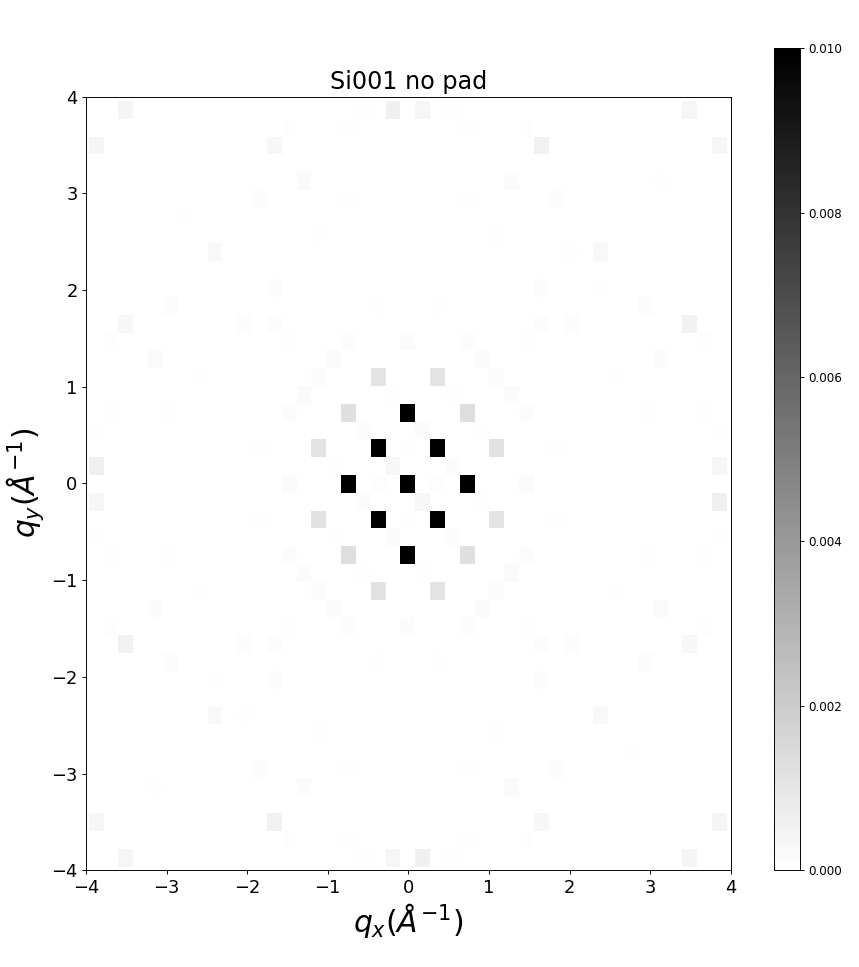

(<Figure size 960x1080 with 2 Axes>,
 <AxesSubplot:title={'center':'Si001 no pad'}, xlabel='$q_x(\\AA^{-1})$', ylabel='$q_y(\\AA^{-1})$'>)

In [256]:
multi_nopad.pattern(Iopt='cNs',title='Si001 no pad',xylims=4,caxis=[0,0.01])

<IPython.core.display.Javascript object>


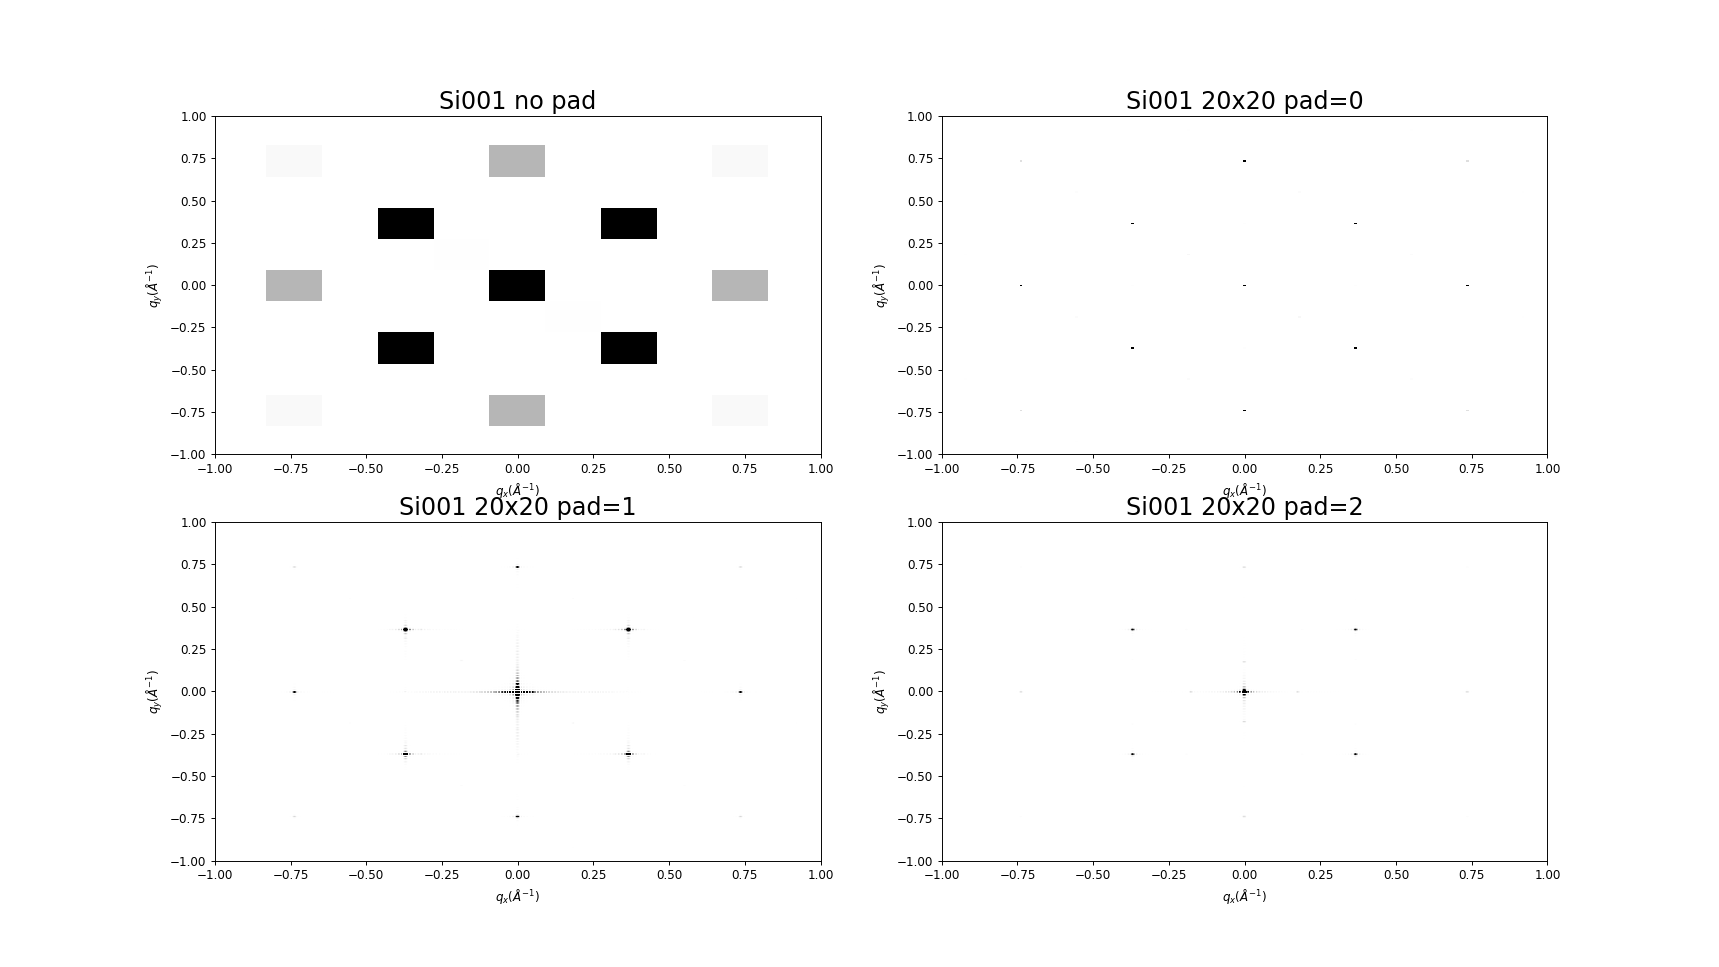

loading /data3/lii26466/multislice/test/test_pad0_autoslic_pattern.npy at z=1086.1A
displaying pattern: (1024, 1024)
loading /data3/lii26466/multislice/test/test_n20_pad0_autoslic_pattern.npy at z=1086.1A
displaying pattern: (1024, 1024)
loading /data3/lii26466/multislice/test/test_n20_pad1_autoslic_pattern.npy at z=1086.1A
displaying pattern: (1024, 1024)
loading /data3/lii26466/multislice/test/test_n20_pad2_autoslic_pattern.npy at z=1086.1A
displaying pattern: (1024, 1024)


<IPython.core.display.Javascript object>


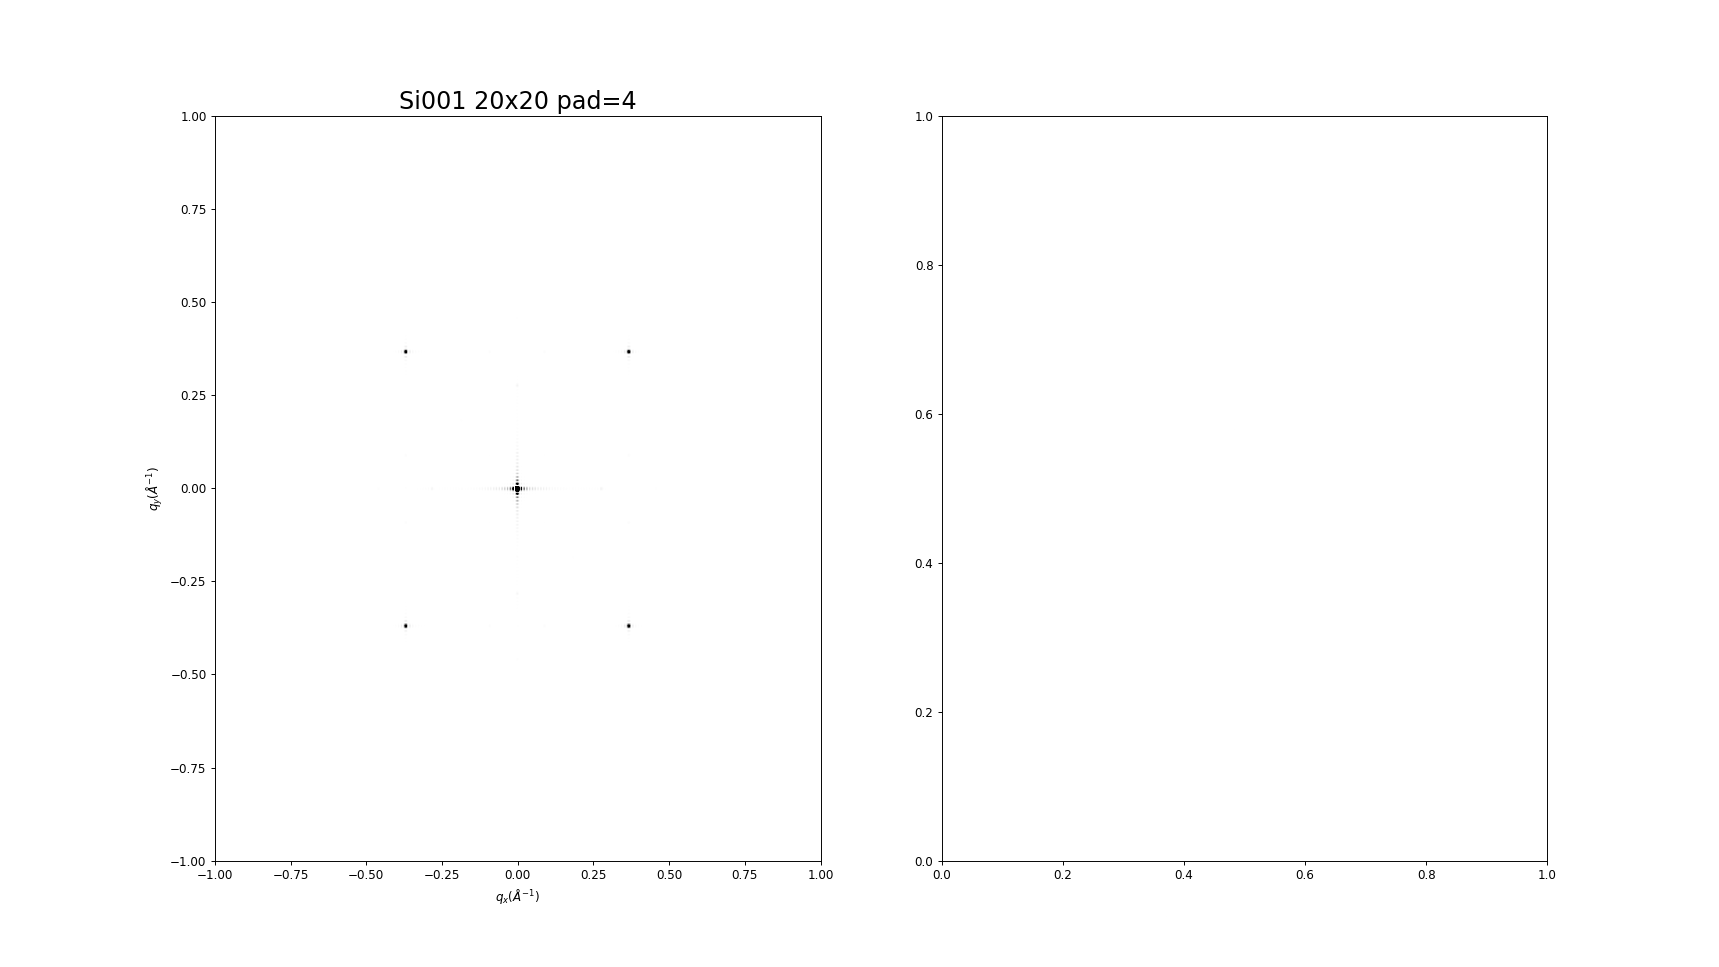

loading /data3/lii26466/multislice/test/test_n20_pad4_autoslic_pattern.npy at z=1086.1A
displaying pattern: (1024, 1024)


NameError: name 'multi_rep2' is not defined

In [4]:
pargs = {'Iopt':'cNs','gs':1,'Nmax':512,'pOpt':'tX','xylims':1,'fonts':{'lab':10,'tick':10}}#'caxis':[0,0.005] 

fig,((ax0,ax1),(ax2,ax3)) = dsp.create_fig(figsize='f',rc=[2,2])
multi_nopad.pattern(ax=ax0,title='Si001 no pad'    ,caxis=[0,0.05],**pargs);
multi_pad0.pattern(ax=ax1,title='Si001 20x20 pad=0',caxis=[0,0.01],**pargs);
multi_pad1.pattern(ax=ax2,title='Si001 20x20 pad=1',caxis=[0,0.0001],**pargs);
multi_pad2.pattern(ax=ax3,title='Si001 20x20 pad=2',caxis=[0,0.0001],**pargs);

loading /data3/lii26466/multislice/test/test_n20_pad1_autoslic_pattern.npy at z=1086.1A
displaying pattern: (1024, 1024)


<IPython.core.display.Javascript object>


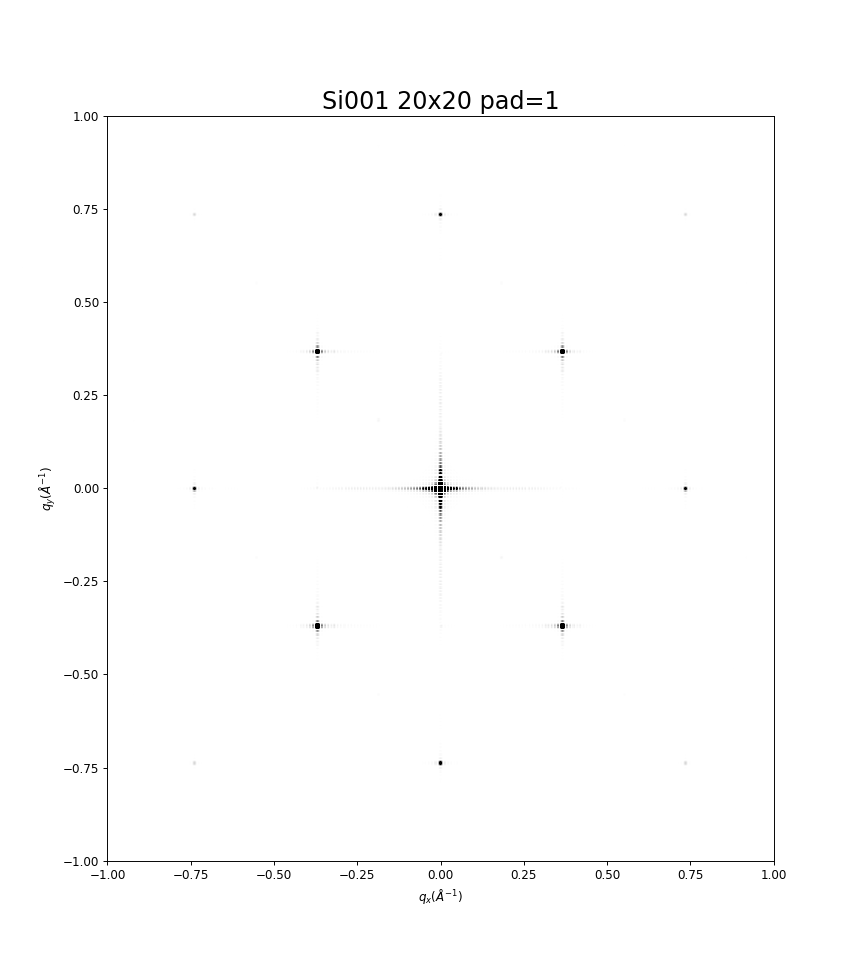

In [17]:
# fig,(ax4,ax5) = dsp.create_fig(figsize='f',rc=[1,2])
multi_rep1.pattern(title='Si001 20x20 pad=1',caxis=[0,0.0001],**pargs);
# multi_rep2.pattern(ax=ax5,title='Si001 40x40 pad=1',caxis=[0,0.00001],**pargs);

<IPython.core.display.Javascript object>


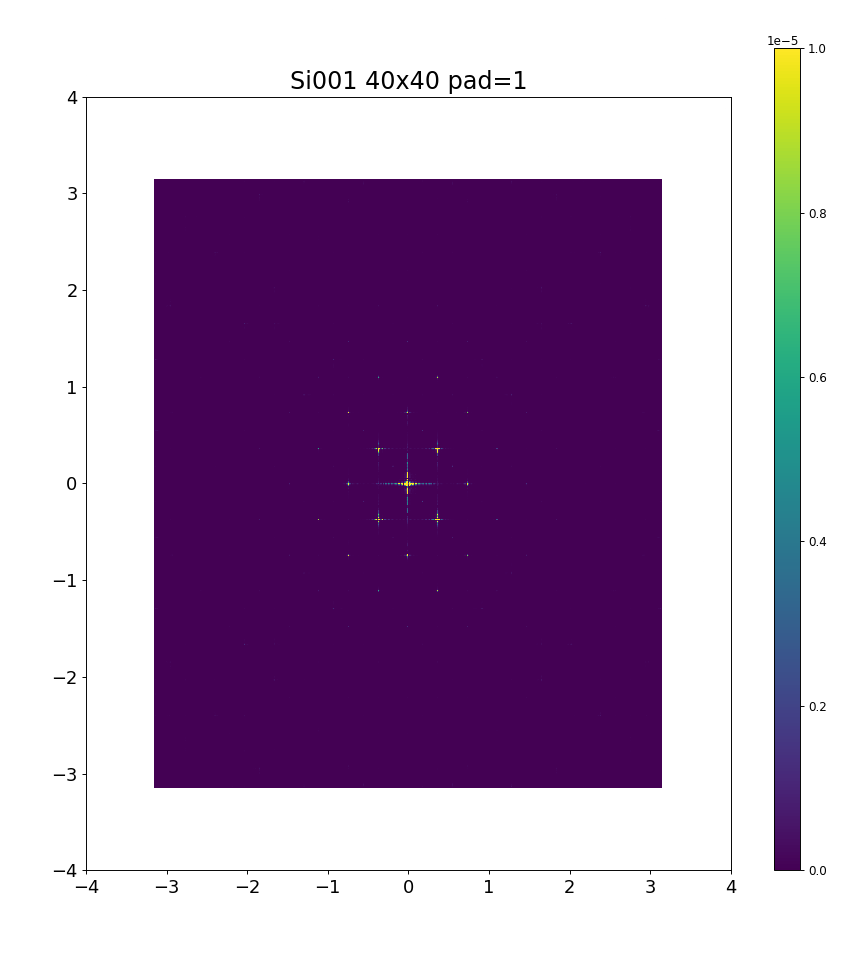

interactive(children=(Text(value='0.00001', description='x'), Output()), _dom_classes=('widget-interact',))

In [259]:
pargs = {'Iopt':'cNs','gs':1,'Nmax':1024}#,'pOpt':'tX','xylims':1,'fonts':{'lab':10,'tick':10}}#'caxis':[0,0.005] 
qx,qy,im0 = multi_pad1.pattern(out=1,**pargs);
fig,ax = dsp.create_fig()
y = np.linspace(0,1,100)
def func1(x):
    print('vmax=',float(x))
    ax.cla()
    dsp.stddisp(ax=ax,fig=fig,im=[qx,qy,im0],title='Si001 40x40 pad=1',pOpt='im',cmap='viridis',xylims=4,caxis=[0,float(x)])
    print('ok')
interact(func1, x="0.00001");

In [206]:
multis = [multi_nopad,multi_pad0,multi_pad1,multi_pad2,multi_pad4,multi_rep2]
# I0 = [m.pattern(Iopt='',out=1,v=1)[-1] for m in multis]
# I0 = [np.load(m._outf('patternnpy')) for m in multis]
# I1 = [I/(np.prod(m.NxNy))**2 for I,m in zip(I0,multis)]
[I.max() for I,m in zip(I1,multis)]

[0.36871342241648564,
 0.3675274607785042,
 0.6801454402496496,
 0.8847661159114182,
 0.9627615086002841,
 0.680656297409886]

We can see that the strong beam in $h,k=(\pm 2,\pm 2)$ are visible in both cases and positioned at the same place in reciprocal space. On the other hand, reflections appear in the padding simulations around the central spot which do not correspond to crystal Bragg spots. Moreover, lots of other reflections seem completely gone.

**The overall conclusion so far is that padding seems to significantly affect the diffraction patterns obtained for a infinitely periodic crystal**. 

loading data/test/test_pad0_autoslic.pkl
simu status :  done
zmax=1084.9,Imax=1.0000,cpuT=1442.3,wallT=157.7


<IPython.core.display.Javascript object>


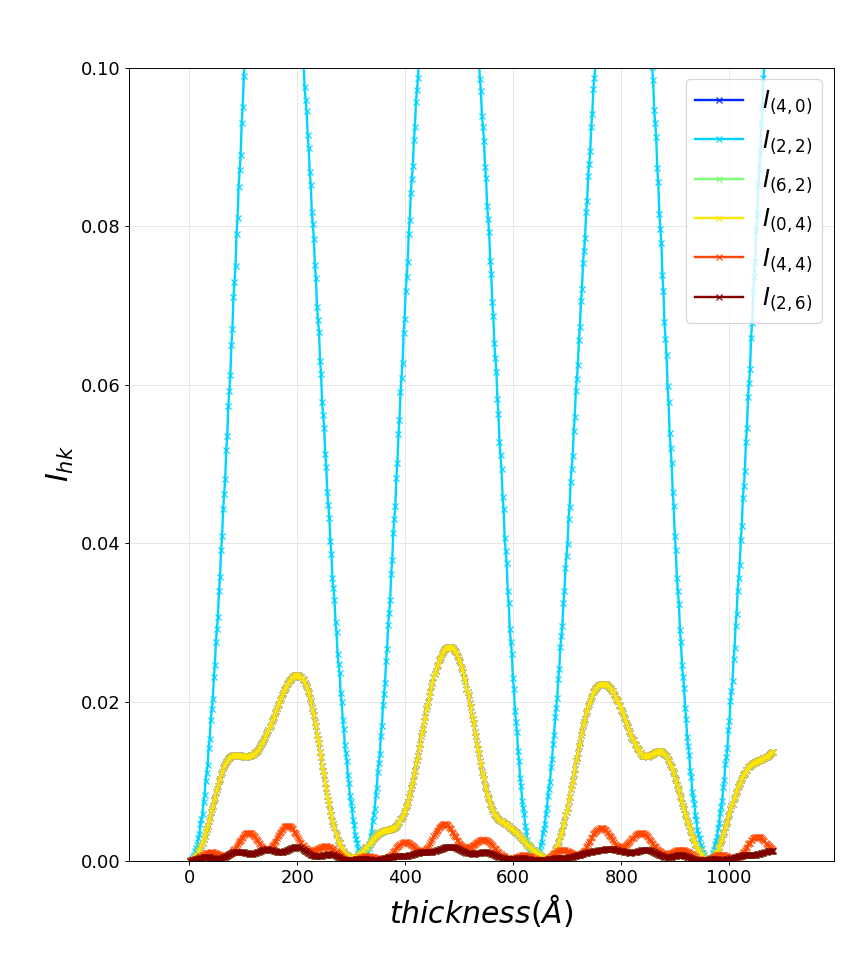

In [10]:
multi = pp.load(path,tag='pad0',v=2)#;multi.print_log()
# multi.patterns2gif('figures/001_patterns.gif',caxis=[0,0.1],Iopt='cNs',Nmax=256,xylims=1,cmap='jet')#,v=2)
# multi.save_pattern(iz=25)
# multi.pattern(iz=15,caxis=[-6,-2],cmap='jet',v=2,**pargs);
# qx,qy,I = multi.pattern(iz=25,caxis=[-6,-2],cmap='jet',out=1,**pargs);
# dsp.stddisp([range(I[s].size),I[s],'b'],lw=2,)
# multi.beam_vs_thickness(orig=0,iBs=[(i,8) for i in range(2,8)],tol=1e-5,xylims=['y',0,0.1],cm='jet')
multi.beam_vs_thickness(orig=0,tol=1e-3,xylims=['y',0,0.1],cm='jet')

rep0,pad0 | rep1,pad4 | rep2,pad1
---- | ----- | ----
![](figures/001_patterns.gif) | ![](figures/001_patterns.gif) | ![](figures/001_patterns.gif)

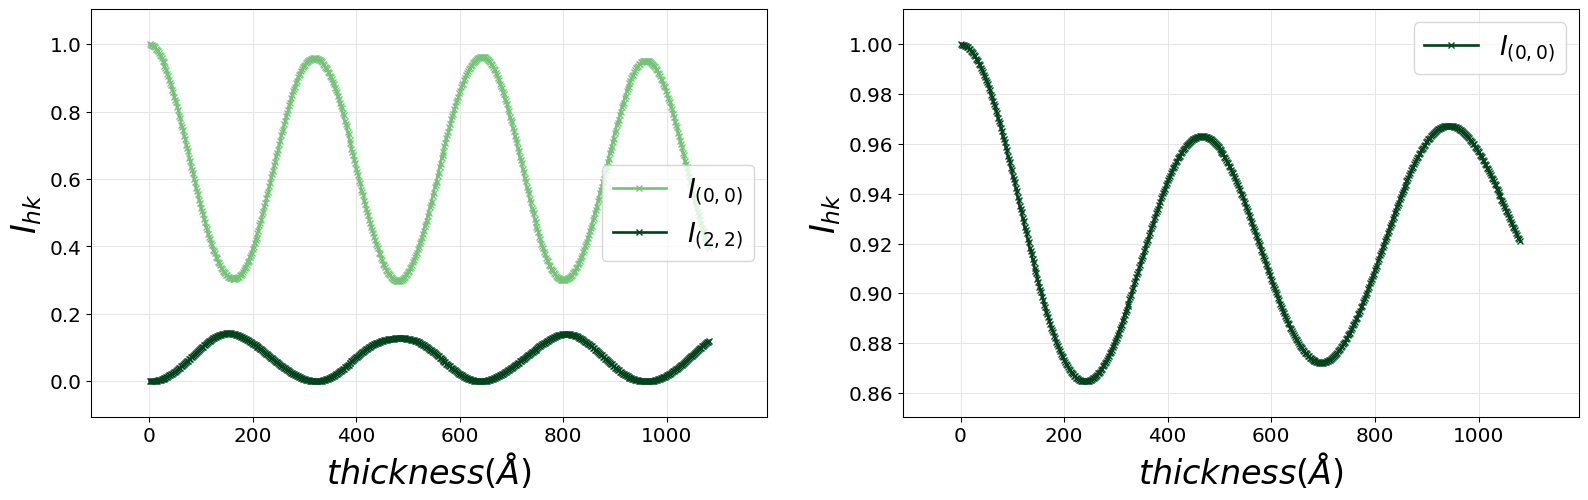

In [17]:
fig,(ax0,ax1) = dsp.create_fig(figsize='21',rc=[1,2])
multi_pad0.beam_vs_thickness(orig=1,ax=ax0,setPos=0)
multi_pad1.beam_vs_thickness(orig=1,ax=ax1,setPos=0)

## Orienting the structure

###  [001] orientation with 45 degree angle
We now rotate the structure by 45 degrees around the [001] beam.

coords file saved : 
data/test/Si001_13.xyz
binary coords file saved :data/test/Si001_13.npy
...loading file...
...plotting...
...plotting...


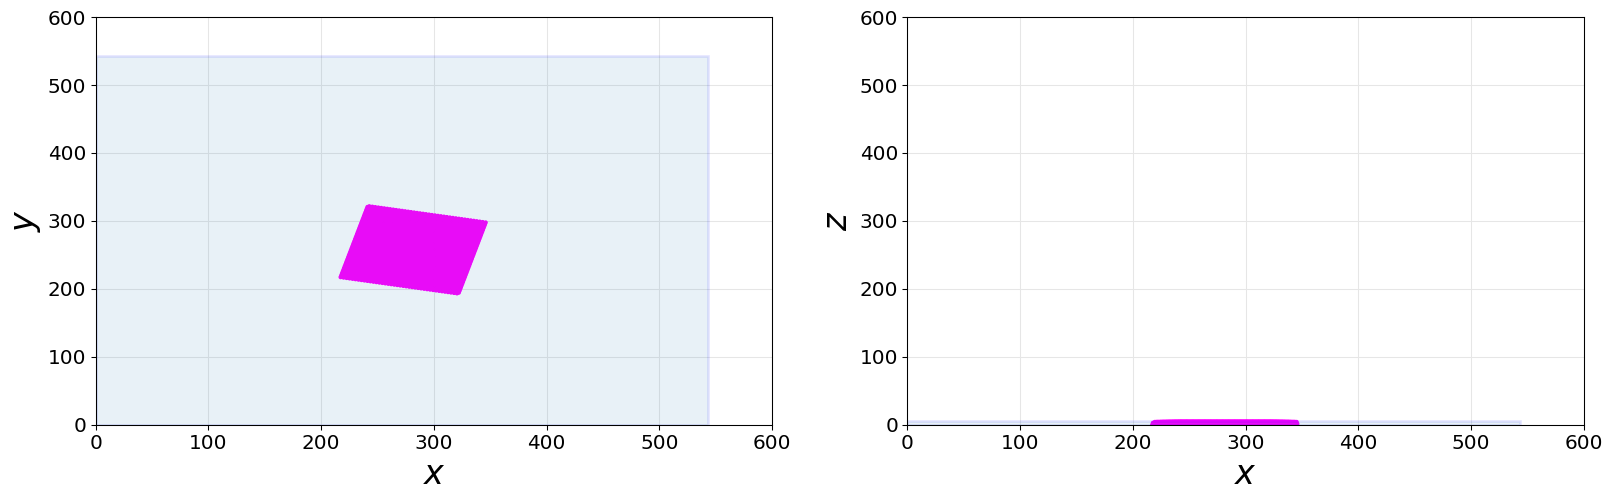

In [16]:
mut.gen_xyz('Si',n=[0,0,1],theta=13,rep=[20,20,1],pad=[2,2,0],xyz=path+'Si001_13.xyz')

# fig,(ax1,ax2) = dsp.create_fig(figsize='21',rc=[1,2])
mut.show_grid(path+'Si001_13.xyz',opts=['xy','xz'],xylims=[0,600,0,600])#,ax=ax1,setPos=0)

In [18]:
args_pad={'name':path,'mulslice':False,'keV':200,'repeat':[1,1,200],'NxNy':2**12,'slice_thick':1.91,'Nhk':80}
mupy.Multislice(data='Si001_13.xyz',opt='srf',ppopt='w',ssh='badb',tag='pad001_13',i_slice=10, **args_pad);

Simu name pattern = test_pad001_13_autoslic
ax=543.070A, by=543.070, cz= 5.4307
simulated thickness = 1086.140 A, nslices=568
Decks saved :
/data3/lii26466/multislice/test/test_pad001_13_autoslic.in
object saved
/data3/lii26466/multislice/test/test_pad001_13_autoslic.pkl
/data3/lii26466/multislice/test/test_pad001_13_autoslic.sh

test_pad001_13_autoslic job submitted at Tue Apr 27 14:25:18 2021


In [45]:
import importlib as imp;imp.reload(mupy);imp.reload(pp)
multi = pp.load(path,'pad001_13',v=2)#;multi.print_log()
pargs = {'Iopt':'cns','Nmax':512,'caxis':[0,0.0025],'xylims':1.5}#,'tol':1e-7,}
# multi.pattern(iz=5,v=2,**pargs)
# for iz in range(10) : multi_pad0.pattern(iz=iz,caxis=[0,0.01],title=r'Si [001], $\theta=45$',**pargs);
multi.patterns2gif('figures/Si001_13_patterns.gif',v=1,**pargs)
# multi_pad0.beam_vs_thickness(orig=1,tol=1e-3,opt='sp',name='figures/pad001_13_beams.svg')

using dpi=96
using screenszie=[20.0,11.25] inches
loading data/test/test_pad001_13_autoslic.pkl
simu status :  done
zmax=1084.9,Imax=0.9895,cpuT=2960.7,wallT=2019.4
...saving patterns to png...
displaying pattern: (1024, 1024)
Saving figure :
figures/Si001_13_patterns0000.png
displaying pattern: (1024, 1024)
Saving figure :
figures/Si001_13_patterns0001.png
displaying pattern: (1024, 1024)
Saving figure :
figures/Si001_13_patterns0002.png
displaying pattern: (1024, 1024)
Saving figure :
figures/Si001_13_patterns0003.png
displaying pattern: (1024, 1024)
Saving figure :
figures/Si001_13_patterns0004.png
displaying pattern: (1024, 1024)
Saving figure :
figures/Si001_13_patterns0005.png
displaying pattern: (1024, 1024)
Saving figure :
figures/Si001_13_patterns0006.png
displaying pattern: (1024, 1024)
Saving figure :
figures/Si001_13_patterns0007.png
displaying pattern: (1024, 1024)
Saving figure :
figures/Si001_13_patterns0008.png
displaying pattern: (1024, 1024)
Saving figure :
figures/Si

In [34]:
# I = np.load(multi._outf('patternnpy'))
# I[I>1e8]

array([2.48896969e+14, 8.86508698e+11, 5.80691357e+11, ...,
       2.13744721e+11, 5.00214603e+11, 7.74427568e+11])

001-13deg 

<!-- beams | gif -->
<!-- --------- | ---  -->
<!-- ![](figures/pad001_45_beams.svg) |  ![](figures/Si001_45_patterns.gif)  -->

![](figures/Si001_13_patterns.gif)
 
1 | 2  | 3   
--| -- | -- 
![](figures/Si001_13_patterns0005.png) | ![](figures/Si001_13_patterns0011.png) | ![](figures/Si001_13_patterns0027.png) 


### [111] orientation with large padding

We orient the beam along the [111] axis. 
Using `gen_xyz` would duplicate the crystal and then orient it. 
Since the crystal is rather large we also use the 'h' option in `popts` to only display the boundaries of the crystal.

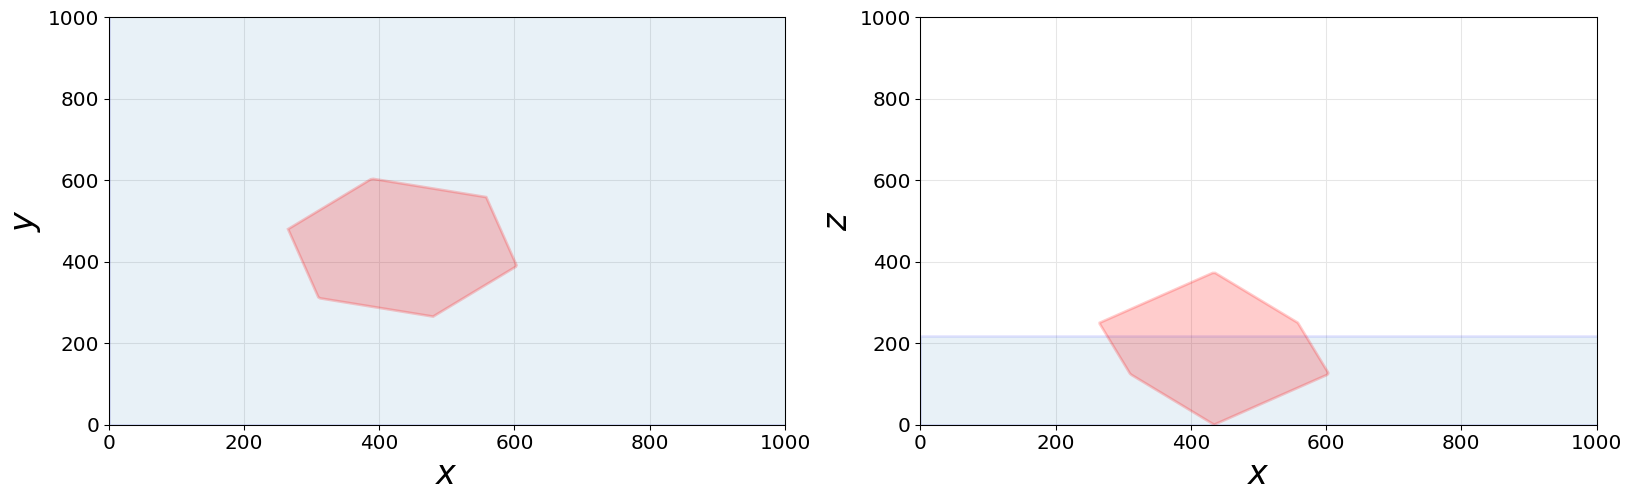

In [2]:
xyz_file = path+'Si111.xyz'
#mut.gen_xyz('Si',xyz=xyz_file,n=[1,1,1],theta=0,rep=[40,40,40],pad=[2,2,0])
mut.show_grid(xyz_file,opts=['xy','xz'],popts='h',xylims=[0,1000,0,1000])

Using `gen_xyz2` will orient the crystal and figure out the unit cells to consider so the crystal fits into a box with dimensions `lat_params`. This has the advantage of better controlling the overall thickness and transverse size of the domain. 

...import file...
...finding unit cells index...
...saving to file ...
coords file saved : 
data/test/Si111_gen2_pad1.xyz
binary coords file saved :data/test/Si111_gen2_pad1.npy
number of coordinates = 124664
number of unit cells  = 15583


/home/lii26466/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


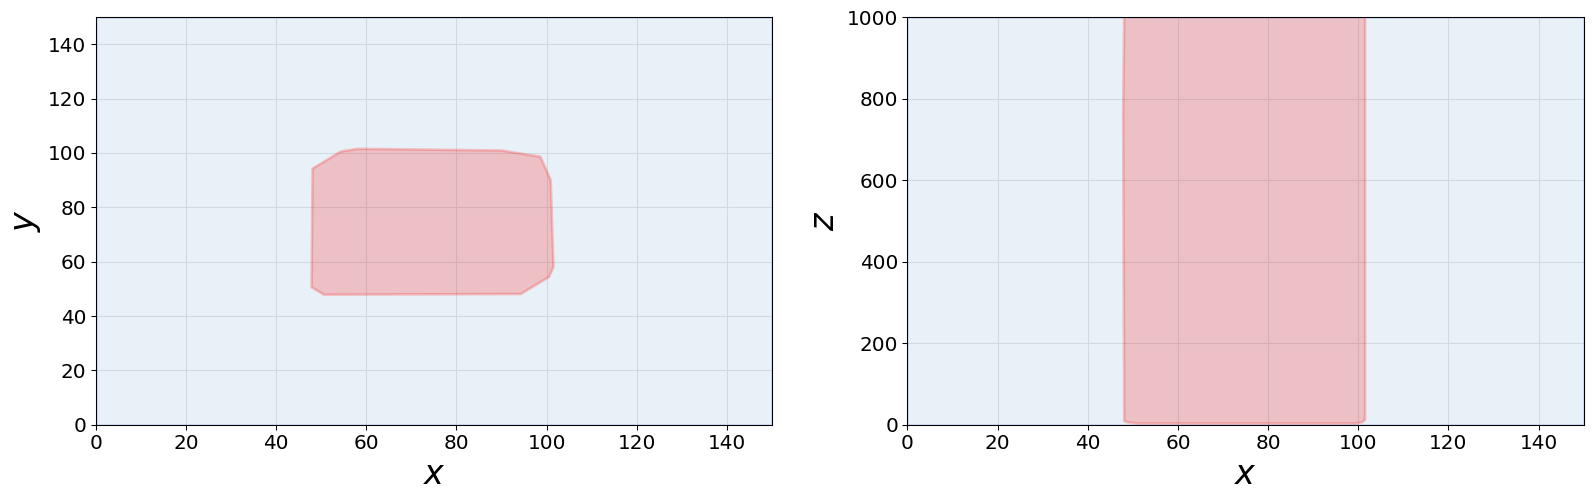

In [5]:
xyz_file = path+'Si111_gen2_pad1.xyz'
mut.gen_xyz2('Si',xyz=xyz_file,n=[1,1,1],theta=0,lat_params=[50,50,1000],pad=1,opts='v')
mut.show_grid(xyz_file,opts=['xy','xz'],popts='hp')#,xylims=[0,250,-5,1010])

The crystal is only $50A$ wide($\approx 10$ unit cells) we should expect the Laue lobes to be $0.02A^{-1}$ wide. The bragg planes being be $\approx 0.2A^{-1}$ appart it should be enough to resolve them.

Using a sampling of 4096 points provides a real space resolution of $0.06A$ and a reciprocal space bandwidth $\approx 8A^{-1}$ which results in $bw\approx 5.4A^{-1}$ with the multislice limited bandwidth factor.

Since the domain is $250A$ wide the reciprocal space resolution is $0.004A^{-1}$ so that bragg relflections $h,k$ should be about every 50 samples.

With this somewhat large sampling, saving the diffraction pattern frequently result in non negligible usage of cpu time.

In [6]:
mupy.Multislice(name=path,data='Si111_gen2_pad1.xyz',opt='sr',ppopt='ws',ssh='badb',tag='rot111_pad1',i_slice=20,
    keV=200,repeat=[1,1,1],NxNy=2**12,slice_thick=1,Nhk=10,hk_pad=50);

Simu name pattern = test_rot111_pad1_autoslic
ax=150.000A, by=150.000, cz= 1000.0
simulated thickness = 1000.000 A, nslices=1000
Decks saved :
/data3/lii26466/multislice/test/test_rot111_pad1_autoslic.in
object saved
/data3/lii26466/multislice/test/test_rot111_pad1_autoslic.pkl
/data3/lii26466/multislice/test/test_rot111_pad1_autoslic.sh

test_rot111_pad1_autoslic job submitted at Tue Apr 27 11:50:11 2021


In [154]:
multi_pad1 = pp.load(path,'rot111_pad1',v=2)#; multi_pad1.print_log()
# multi_pad1.get_beams(bOpt='fa');

loading data/test/test_rot111_pad1_autoslic.pkl
simu status :  done
zmax=1003.0,Imax=0.9978,cpuT=3878.9,wallT=2901.5


In [158]:
pargs = {'Iopt':'cNs','Nmax':256,'caxis':[0,0.0001],'xylims':1}#,'tol':1e-7,}

# multi_pad1.pattern(name='figures/rot111_pattern.png',opt='sp',caxis=[-6,0],**pargs);
# multi_pad1.beam_vs_thickness(orig=1,tol=1e-6,opt='sp',name='figures/rot111_beams.svg')
for iz in [30,40]:
    multi_pad1.save_pattern(iz=iz)
    multi_pad1.pattern(iz=iz,name='figures/rot111_pattern%d.png' %iz,opt='sc',**pargs)

loading pattern /data3/lii26466/multislice/test/test_rot111_pad1_autoslic_pattern.txt.030
saving
file saved : /data3/lii26466/multislice/test/test_rot111_pad1_autoslic_pattern030.npy
displaying pattern: (512, 512)
Saving figure :
figures/rot111_pattern30.png
loading pattern /data3/lii26466/multislice/test/test_rot111_pad1_autoslic_pattern.txt.040
saving
file saved : /data3/lii26466/multislice/test/test_rot111_pad1_autoslic_pattern040.npy
displaying pattern: (512, 512)
Saving figure :
figures/rot111_pattern40.png


beams | 20 | 40 
--- | ---- | ---
 ![](figures/rot111_beams.svg) | ![](figures/rot111_pattern30.png) | ![](figures/rot111_pattern40.png)

### Orienting without padding 

Just as a simple attempt, we simulate a crystal where the periodic boundary condition is not fullfilled which should affect scattering at large angles. 

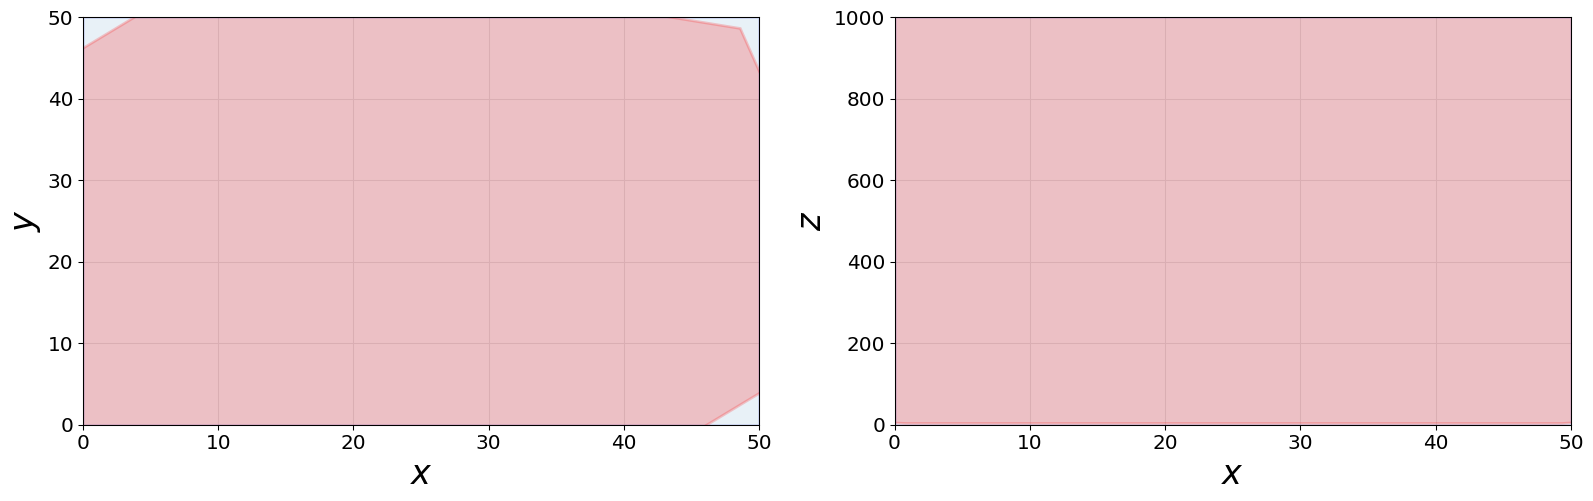

In [117]:
xyz_file = path+'Si111_gen2_pad0.xyz'
# mut.gen_xyz2('Si',xyz=xyz_file,n=[1,1,1],theta=0,lat_params=[50,50,1000],pad=0,opts='v')
mut.show_grid(xyz_file,opts=['xy','xz'],popts='h')#,xylims=[0,250,-5,1010])

In [98]:
mupy.Multislice(name=path,data='Si111_gen2_pad0.xyz',opt='sr',ppopt='ws',ssh='badb',tag='rot111_pad0',i_slice=20,
    keV=200,repeat=[1,1,1],NxNy=2**12,slice_thick=2,Nhk=10,hk_pad=50);

Simu name pattern = test_rot111_pad0_autoslic
ax=50.000A, by=50.000, cz= 1000.0
simulated thickness = 1000.000 A, nslices=500
Decks saved :
/data3/lii26466/multislice/test/test_rot111_pad0_autoslic.in
object saved
/data3/lii26466/multislice/test/test_rot111_pad0_autoslic.pkl
/data3/lii26466/multislice/test/test_rot111_pad0_autoslic.sh

test_rot111_pad0_autoslic job submitted at Mon Apr 26 17:25:29 2021


Let's compare the gif patterns with and without padding in this configuration. 

In [159]:
multi0 = pp.load(path,'rot111_pad0',v=2)#;multi.print_log()
multi1 = pp.load(path,'rot111_pad1',v=2)#;multi.print_log()

loading data/test/test_rot111_pad0_autoslic.pkl
simu status :  done
zmax=1004.0,Imax=0.9993,cpuT=3737.4,wallT=1976.8
loading data/test/test_rot111_pad1_autoslic.pkl
simu status :  done
zmax=1003.0,Imax=0.9978,cpuT=3878.9,wallT=2901.5


loading /data3/lii26466/multislice/test/test_rot111_pad1_autoslic_pattern019.npy at z=380.0A
original image shape (4096, 4096)
displaying pattern: (512, 512)


(<Figure size 960x1080 with 2 Axes>,
 <AxesSubplot:title={'center':'z=380 A'}, xlabel='$q_x(\\AA^{-1})$', ylabel='$q_y(\\AA^{-1})$'>)

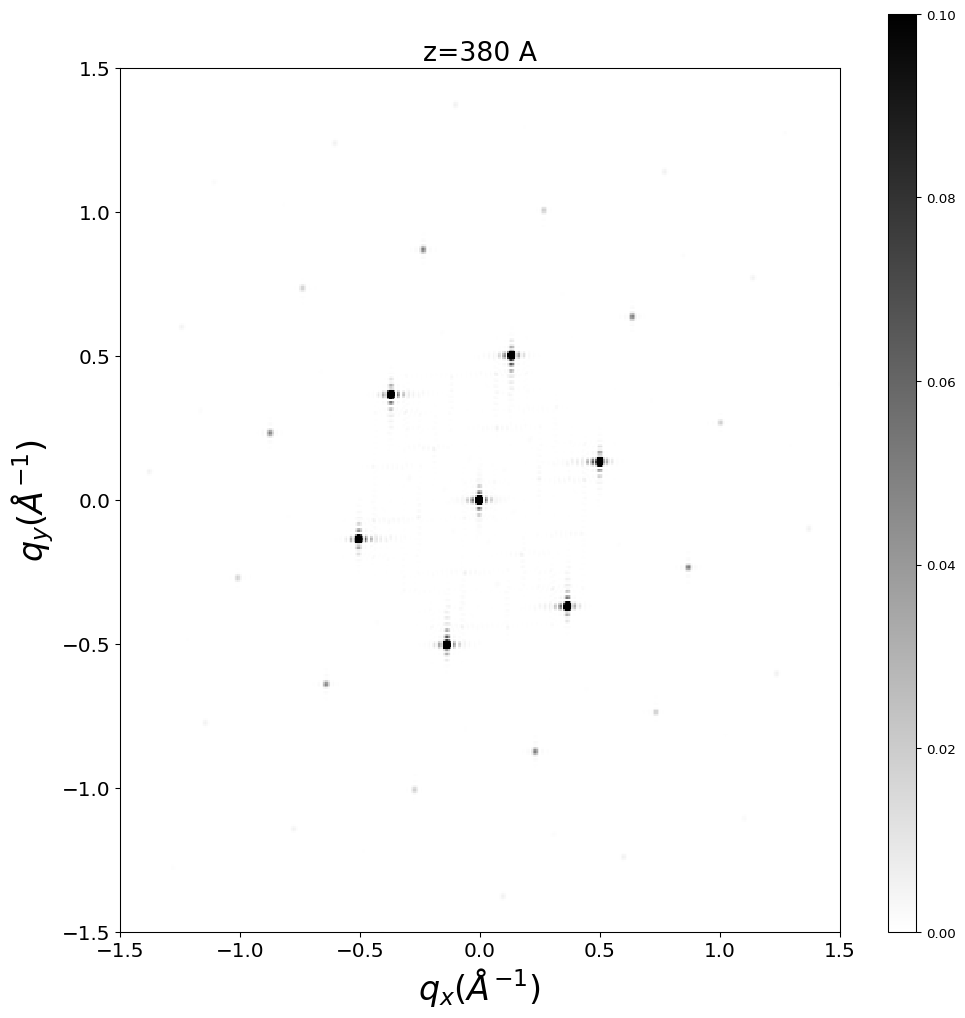

In [170]:
# import importlib as imp;imp.reload(pp);imp.reload(mupy)
pargs = {'Iopt':'cns','Nmax':256,'xylims':1.5}#,'pOpt':'im'}

iz = 19
# multi1.save_pattern(iz=iz)
# pargs = {'Iopt':'cns','Nmax':256,'xylims':1,'caxis':[0,0.001]}

# fig,(ax0,ax1) = dsp.create_fig(figsize='f',rc=[1,2])
# multi0.pattern(iz=iz,name='figures/rot111_pad0_pattern%d.png' %iz,caxis=[0,0.01],opt='p',v=2,**pargs)
multi1.pattern(iz=iz,name='figures/rot111_pad1_pattern%d.png' %iz,caxis=[0,0.1],opt='p',v=2,**pargs)

In [ ]:
# multi.patterns_saved=0
multi0.patterns2gif('figures/111_pad0_.gif','caxis':[0,0.01],v=1,**pargs)

In [ ]:
multi1.patterns2gif('figures/rot111_pad1pattern.gif','caxis':[0,0.01],v=1,**pargs)

Animated pattern 

with pad | no pad
---- | -----
![](figures/rot111pattern.gif) | ![](figures/111_pad0_.gif) 